# Feature Scaling and Learning Rate

As we have seen if features have various scales, Gradient descent takes long time to converge. In this example we would use ***Feature Scaling*** and appropriate value for ***Learning Rate*** to make Gradient descent faster and hence training the model faster.
We would be reusing some of the code in last exercise - the code is copied here. Better idea would be add these functions to a python module and import here -- TODO

In [1]:
import copy, math
import numpy as np
from multi_regression import predict, compute_cost, gradient, gradient_descent,z_score_normalize 
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
x_features = ['size(sqft)','bedrooms','floors','age']



There are multiple ways for ***Feature Scaling**. The one we would use here is ***Z-Score Normalization***. The way to do this is:
To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2
\end{align}
$$

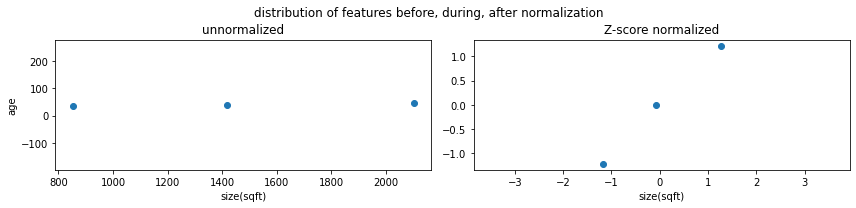

In [3]:
fig,ax=plt.subplots(1, 2, figsize=(12, 3))
ax[0].scatter(x_train[:,0], x_train[:,3])
ax[0].set_xlabel(x_features[0]); ax[0].set_ylabel(x_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

x_norm, mu, std = z_score_normalize(x_train)

ax[1].scatter(x_norm[:,0], x_norm[:,3])
ax[1].set_xlabel(x_features[0]); ax[0].set_ylabel(x_features[3]);
ax[1].set_title(r"Z-score normalized")
ax[1].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

In [4]:
# normalize the original features
x_norm, x_mu, x_sigma = z_score_normalize(x_train)
print(f"X_mu = {x_mu}, \nX_sigma = {x_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_norm,axis=0)}")

X_mu = [1.45733333e+03 3.33333333e+00 1.33333333e+00 4.00000000e+01], 
X_sigma = [5.11961804e+02 1.24721913e+00 4.71404521e-01 4.08248290e+00]
Peak to Peak range by column in Raw        X:[1252    3    1   10]
Peak to Peak range by column in Normalized X:[2.44549494 2.40535118 2.12132034 2.44948974]


In [5]:
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 1.0e-2
# run gradient descent 
w_final, b_final, j_history = gradient_descent(x_norm, y_train, initial_w, initial_b,alpha, iterations)

Iteration    0: Cost 48254.77   
Iteration   10: Cost 37638.21   
Iteration   20: Cost 29787.62   
Iteration   30: Cost 23820.27   
Iteration   40: Cost 19186.73   
Iteration   50: Cost 15531.61   
Iteration   60: Cost 12615.45   
Iteration   70: Cost 10270.30   
Iteration   80: Cost  8373.97   
Iteration   90: Cost  6834.84   
Iteration  100: Cost  5582.45   
Iteration  110: Cost  4561.65   
Iteration  120: Cost  3728.65   
Iteration  130: Cost  3048.40   
Iteration  140: Cost  2492.59   
Iteration  150: Cost  2038.30   
Iteration  160: Cost  1666.92   
Iteration  170: Cost  1363.25   
Iteration  180: Cost  1114.94   
Iteration  190: Cost   911.87   
Iteration  200: Cost   745.80   
Iteration  210: Cost   609.97   
Iteration  220: Cost   498.89   
Iteration  230: Cost   408.04   
Iteration  240: Cost   333.73   
Iteration  250: Cost   272.96   
Iteration  260: Cost   223.25   
Iteration  270: Cost   182.59   
Iteration  280: Cost   149.34   
Iteration  290: Cost   122.15   
Iteration 

In [8]:
print(w_final)
print(b_final)

[ 38.05168398  41.54320558 -30.98791712  36.34190238]
289.987480338251


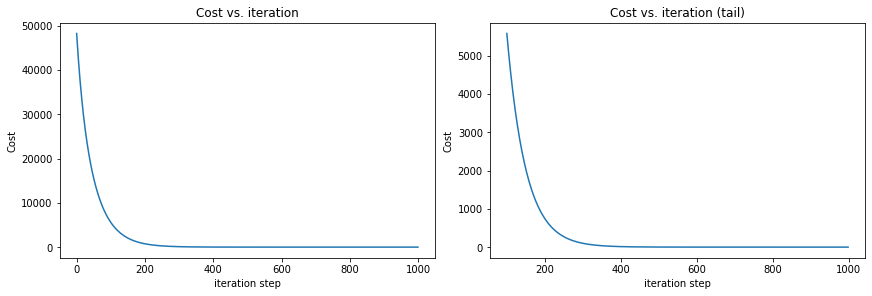

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_history)
ax2.plot(100 + np.arange(len(j_history[100:])), j_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

As we can see the gradient descent is converging faster after feature scaling and choosing right value of learning rate.

Another important point - As we have scaled the features we need to do the same for prediction as well. See the example below for predictions:

In [7]:
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - x_mu)/x_sigma

y_predict = predict(x_house_norm, w_final, b_final)
print(y_predict)

281.66999618210247
